# **Week 3 – ML Model Development (Logistic Regression From Scratch)**

This week, we train a machine learning model using the cleaned dataset.  
We implement **Logistic Regression from scratch using NumPy** to understand how the algorithm works internally and compare its performance with Scikit-Learn’s LogisticRegression.  

# Student Information
**Name: Vishal Baraiya**  
**Enrollment No.: 23010101014**  
**Roll No.: C3-635**  
**Course:** Machine Learning & Deep Learning Project  

---

# **Objectives of Week 3**

- Train a machine learning model on the cleaned dataset.  
- Implement Logistic Regression from scratch using NumPy.  
- Evaluate the model using accuracy, precision, recall, F1 score, and ROC-AUC.  
- Compare the scratch model with Scikit-Learn’s LogisticRegression.  
- Save the trained model weights and bias for Week-4 Flask deployment.


# **1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

# **2. Load Dataset**

In [2]:
df = pd.read_csv("../data/processed/clean_cardio.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,0,18393,2,0.453998,-0.848131,-0.998901,-0.138532,1,1,0,0,1,0,-0.418152,-1.049108
1,1,20228,1,-1.073987,0.762418,0.797987,0.919187,3,1,0,0,1,1,0.320542,1.433205
2,2,18857,1,0.072002,-0.708084,0.199024,-1.196251,3,1,0,0,0,1,-0.270413,-0.754024
3,3,17623,2,0.581330,0.552347,1.396950,1.976906,1,1,0,0,1,1,-0.713629,0.242436
4,4,17474,1,-1.073987,-1.268275,-1.597864,-2.253970,1,1,0,0,0,0,-0.861367,-0.849142


# **3. Define Features & Target**
### We select the relevant features for modeling.
The target variable is **cardio** (0 = No disease, 1 = Disease).

In [3]:
feature_cols = [
    'age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi',
    'cholesterol', 'gluc', 'smoke', 'alco', 'active'
]

X = df[feature_cols].values
y = df['cardio'].values

# **4. Split Dataset**

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

x_train.shape, x_test.shape

((54864, 11), (13717, 11))

### Choosing the Appropriate Algorithm

The target variable **cardio** is binary (0 = no disease, 1 = disease).  
Since we want to predict the probability of a patient having cardiovascular disease based on multiple numerical and categorical features, this becomes a **binary classification problem**.

For this type of problem, **Logistic Regression** is one of the most suitable and widely used algorithms because:

- It models the probability of a binary outcome.
- It works well with medical datasets and interpretable features.
- It handles linear decision boundaries effectively.
- It allows us to analyze feature importance easily.
- It performs well when data is properly scaled (as in Week 2).

Therefore, we choose **Logistic Regression** as the appropriate algorithm and implement it **from scratch using NumPy**, as required.


# **5. Logistic Regression From Scratch**

We implement:

* Sigmoid function
* Loss (Binary Cross-Entropy)
* Gradient computation
* Weight & bias update


In [5]:
class LogisticRegressionScratch:
    
    def __init__(self, lr=0.01, n_iters=2000):
        self.lr = lr
        self.n_iters = n_iters
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, x, y):
        n_samples, n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.loss_history = []

        for _ in range(self.n_iters):
            # linear model
            linear_model = np.dot(x, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # gradients
            dw = (1/n_samples) * np.dot(x.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # update weights & bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # compute loss (binary cross-entropy)
            loss = -np.mean(
                y*np.log(y_pred + 1e-8) + (1 - y)*np.log(1 - y_pred + 1e-8)
            )
            self.loss_history.append(loss)
    
    def predict_proba(self, x):
        linear_model = np.dot(x, self.weights) + self.bias
        return self.sigmoid(linear_model)
    
    def predict(self, x, threshold=0.5):
        proba = self.predict_proba(x)
        return (proba >= threshold).astype(int)


In [6]:
model_scratch = LogisticRegressionScratch(lr=0.01, n_iters=3000)
model_scratch.fit(x_train, y_train)

print("Training complete!")

Training complete!


# **6. Plot Training Loss**

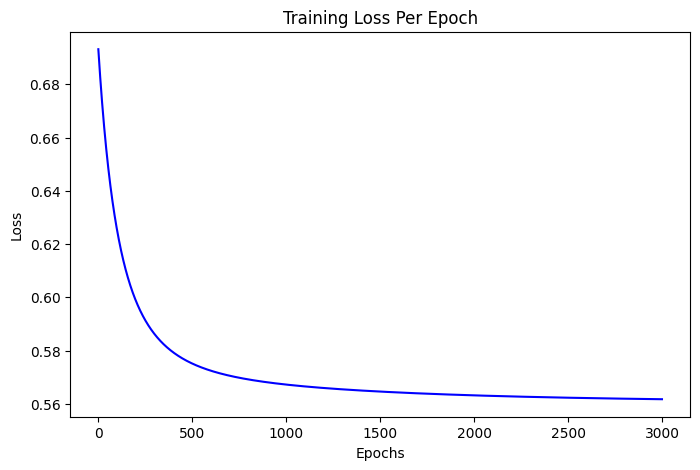

In [7]:
plt.figure(figsize=(8,5))
plt.plot(model_scratch.loss_history, color='blue')
plt.title("Training Loss Per Epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# **7. Evaluate Scratch Model**

In [8]:
y_pred = model_scratch.predict(x_test)
y_proba = model_scratch.predict_proba(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7224611795582124
Precision: 0.7398164546771856
Recall: 0.6771293840259357
F1 Score: 0.7070862506732323


# **8. Confusion Matrix**

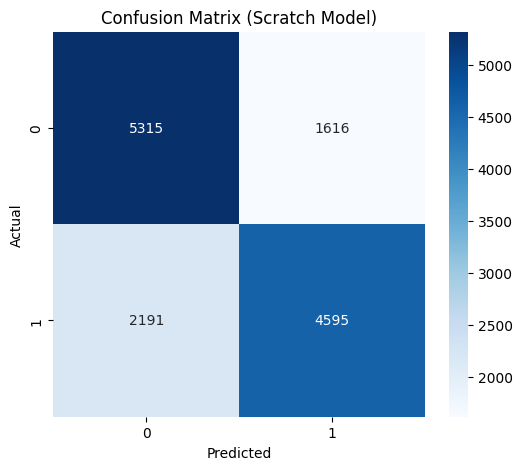

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Scratch Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **9. ROC Curve**

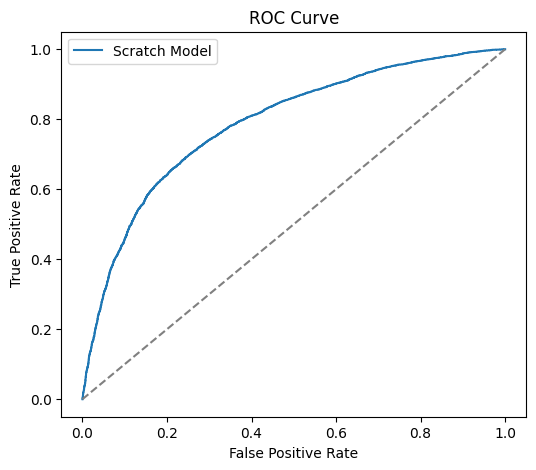

AUC Score: 0.7882303215949155


In [10]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="Scratch Model")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_proba))

# **10. Compare with sklearn LogisticRegression**

In [12]:
sk_model = LogisticRegression(max_iter=5000)
sk_model.fit(x_train, y_train)

sk_pred = sk_model.predict(x_test)
sk_proba = sk_model.predict_proba(x_test)[:,1]

print("Accuracy:", accuracy_score(y_test, sk_pred))
print("Precision:", precision_score(y_test, sk_pred))
print("Recall:", recall_score(y_test, sk_pred))
print("F1 Score:", f1_score(y_test, sk_pred))
print("AUC:", roc_auc_score(y_test, sk_proba))

Accuracy: 0.7242108332725815
Precision: 0.7477313974591652
Recall: 0.6678455643972885
F1 Score: 0.7055343659998443
AUC: 0.7896826399144818


# **11. Save Model Parameters**
These weights will be used in **Week-4 Flask App**.

In [13]:
import os

os.makedirs("../models", exist_ok=True)

np.save("../models/logistic_weights.npy", model_scratch.weights)
np.save("../models/logistic_bias.npy", np.array([model_scratch.bias]))

print("Model parameters saved!")

Model parameters saved!


# **Week 3 Completed Successfully**
* Loaded cleaned dataset
* Performed train-test split
* Implemented **Logistic Regression from scratch** using NumPy
* Trained model with gradient descent
* Visualized loss curve
* Evaluated model using multiple metrics
* Drew confusion matrix & ROC curve
* Compared results with sklearn model
* Saved model weights for deployment
